# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [255]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [256]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [257]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [258]:
df_train.shape

(15223, 52)

In [259]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [260]:
df_test.shape

(14910, 52)

In [261]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [262]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [263]:
df = df_test.append(df_train).reset_index(drop=True)

In [264]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [266]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Ученая степень', 'Среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Государственная служба', 'Банк/Финансы', 'Сельское хозяйство', 'ЧОП/Детективная д-ть', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Строительство', 'Другие сферы', 'Здравоохранение', 'Управляющая компания', 'Салоны красоты и здоровья', 'Транспорт', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Информационные услуги', 'Информационные технологии', 'Образование', 'Маркетинг', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Развлечения/Искусство', 'СМИ/Реклама/PR-агенства', 'Подбор персонала', 'Торговля', 'Туризм', 'Энергетика', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Нефтегазовая промышленность', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [267]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [268]:
## CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT - пропусков нет, но нужно также заменить , на .

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [269]:
## EDUCATION, MARITAL_STATUS, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, FAMILY_INCOME, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM относятся к категориальным признакам и их нужно кодировать

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [270]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    list_change = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in list_change: # заменяем , на . во всех столбцах из списка
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
   
    for j in df_output.columns: # перебираем все столбцы
        if str(df_output[j].dtype) == 'object': # если тип столбца - object
            df_output = df_output[~df_output[j].isnull()] # удаляем из всего массива строки с nan в них
        else:
            df_output[j] = df_output[j].fillna(np.mean(df_output[j])) # для остальных считаем среднее по столбцу       
        
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE'])
    return df_output

In [271]:
df_preproc = df.pipe(preproc_data)

In [272]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [273]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27419 entries, 0 to 30132
Columns: 198 entries, TARGET to REG_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(7), int64(31), object(1), uint8(159)
memory usage: 12.5+ MB


In [274]:
for i in df_preproc.columns: # проверка на остаток nan 
    print(any(df_preproc[i].isnull()))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [275]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [276]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [319]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_train_test)
predict_dtc_proba = dtc.predict_proba(X_train_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=25) # считаем с увеличенным n_estimators иначе , но выше 30 уже ошибка и показатели стремсятся к нулю!
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_train_test)
predict_rfc_proba = rfc.predict_proba(X_train_test) 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_train_test)
predict_lr_proba = lr.predict_proba(X_train_test)


In [330]:
print(predict_dtc_proba[:,1])
print(predict_rfc_proba[:,1])
print(predict_lr_proba[:,1])

[0. 0. 0. ... 1. 0. 0.]
[0.12 0.16 0.08 ... 0.12 0.08 0.2 ]
[0.15790922 0.20767233 0.08458915 ... 0.15305309 0.10350511 0.18268655]


In [338]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results_dtc = []
print('accuracy DTC', accuracy_score(y_train_test, predict_dtc))
print('precision DTC', precision_score(y_train_test, predict_dtc))
print('recall DTC', recall_score(y_train_test, predict_dtc))
print('f1 DTC', f1_score(y_train_test, predict_dtc))
results_dtc.append(accuracy_score(y_train_test, predict_dtc))
results_dtc.append(precision_score(y_train_test, predict_dtc))
results_dtc.append(recall_score(y_train_test, predict_dtc))
results_dtc.append(f1_score(y_train_test, predict_dtc))
print(results_dtc, '\n')

results_rfc = []
print('accuracy RFC', accuracy_score(y_train_test, predict_rfc))
print('precision RFC', precision_score(y_train_test, predict_rfc))
print('recall RFC', recall_score(y_train_test, predict_rfc))
print('f1 RFC', f1_score(y_train_test, predict_rfc))
results_rfc.append(accuracy_score(y_train_test, predict_rfc))
results_rfc.append(precision_score(y_train_test, predict_rfc))
results_rfc.append(recall_score(y_train_test, predict_rfc))
results_rfc.append(f1_score(y_train_test, predict_rfc))
print(results_rfc, '\n')

results_lr = []
print('accuracy LR', accuracy_score(y_train_test, predict_lr))
print('precision LR', precision_score(y_train_test, predict_lr))
print('recall LR', recall_score(y_train_test, predict_lr))
print('f1 LR', f1_score(y_train_test, predict_lr))
results_lr.append(accuracy_score(y_train_test, predict_lr))
results_lr.append(precision_score(y_train_test, predict_lr))
results_lr.append(recall_score(y_train_test, predict_lr))
results_lr.append(f1_score(y_train_test, predict_lr))
print(results_lr, '\n')

accuracy DTC 0.7909550156362761
precision DTC 0.17625231910946196
recall DTC 0.18269230769230768
f1 DTC 0.1794145420207743
[0.7909550156362761, 0.17625231910946196, 0.18269230769230768, 0.1794145420207743] 

accuracy RFC 0.8749097907144575
precision RFC 0.5
recall RFC 0.007692307692307693
f1 RFC 0.015151515151515154
[0.8749097907144575, 0.5, 0.007692307692307693, 0.015151515151515154] 

accuracy LR 0.8744286745248978
precision LR 0.0
recall LR 0.0
f1 LR 0.0
[0.8744286745248978, 0.0, 0.0, 0.0] 



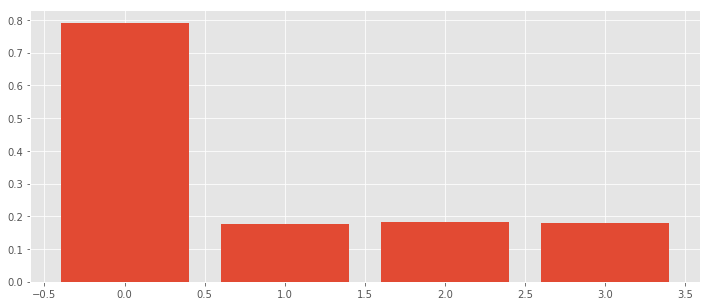

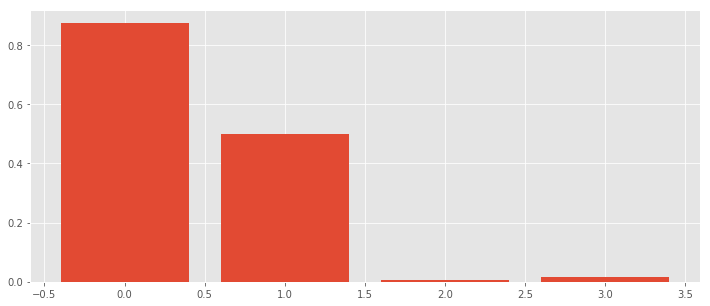

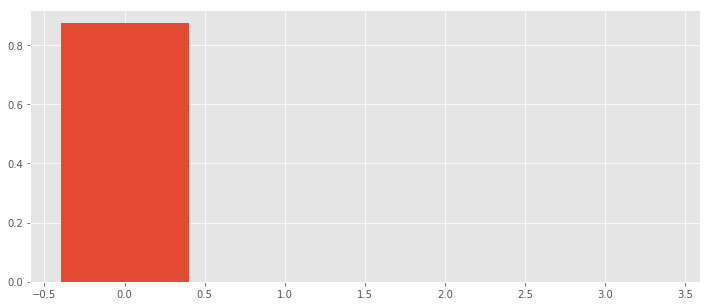

In [332]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

plt.bar(range(4), results_dtc)
plt.show()
plt.bar(range(4), results_rfc)
plt.show()
plt.bar(range(4), results_lr)
plt.show()

ROC AUC DTC 0.5303068357268247
ROC AUC RFC 0.6129317273323321
ROC AUC LR 0.5862333706985893


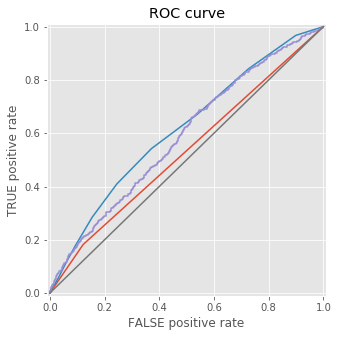

In [327]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import roc_auc_score, roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_train_test, predict_dtc_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_train_test, predict_rfc_proba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_train_test, predict_lr_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)

plt.plot([0, 1], [0, 1])
plt.ylabel('TRUE positive rate')
plt.xlabel('FALSE positive rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('ROC AUC DTC', roc_auc_score(y_train_test, predict_dtc_proba[:,1]))
print('ROC AUC RFC', roc_auc_score(y_train_test, predict_rfc_proba[:,1]))
print('ROC AUC LR', roc_auc_score(y_train_test, predict_lr_proba[:,1]))


In [348]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123) # ??? не понятно использование. вопрос на форуме

CVS_dtc = cross_val_score(dtc, X_train_test, y_train_test, scoring='roc_auc', cv=10)
CVS_rfc = cross_val_score(rfc, X_train_test, y_train_test, scoring='roc_auc', cv=10)
CVS_lr = cross_val_score(lr, X_train_test, y_train_test, scoring='roc_auc', cv=10)

print('DTC алгоритм кросс ROC AUC кросс валидация:', CVS_dtc, '\n', 'Среднее значение ROC AUC:', np.mean(CVS_dtc), '\n')
print('RFC алгоритм кросс ROC AUC кросс валидация:', CVS_rfc, '\n', 'Среднее значение ROC AUC:', np.mean(CVS_rfc), '\n')
print('LR алгоритм кросс ROC AUC кросс валидация:', CVS_lr, '\n', 'Среднее значение ROC AUC:', np.mean(CVS_lr), '\n')

DTC алгоритм кросс ROC AUC кросс валидация: [0.5206044  0.53983516 0.54258242 0.51923077 0.51648352 0.49587912
 0.50274725 0.4682136  0.49433143 0.50942996] 
 Среднее значение ROC AUC: 0.5109337632064904 

RFC алгоритм кросс ROC AUC кросс валидация: [0.61681107 0.52871407 0.5841082  0.64518174 0.60915046 0.54477494
 0.60265216 0.47875609 0.56646006 0.64356855] 
 Среднее значение ROC AUC: 0.5820177345964058 

LR алгоритм кросс ROC AUC кросс валидация: [0.64053254 0.57539096 0.62114328 0.61506762 0.59034235 0.60148986
 0.63535503 0.55610299 0.58142615 0.65532952] 
 Среднее значение ROC AUC: 0.6072180296393583 



[[0.92 0.08]
 [0.72 0.28]
 [0.6  0.4 ]
 ...
 [0.84 0.16]
 [0.84 0.16]
 [0.84 0.16]]


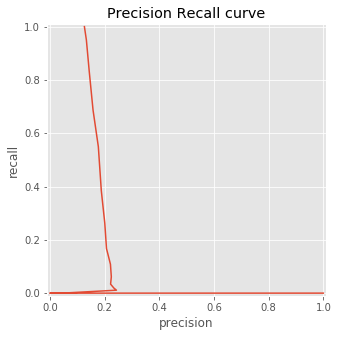

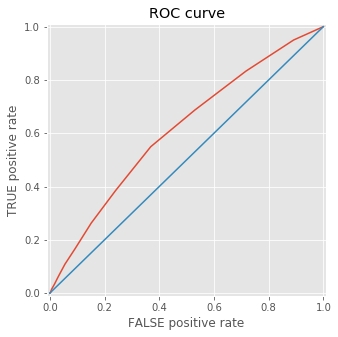

In [336]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
from sklearn.metrics import precision_recall_curve

# несмотря на выше средний ROC AUC в кросс валидации у Linear Regression, беру RandomForest с более высоким accurace, precision, recall, f1. 
# у LR часть этих метрик - нули

predict_rfc_proba_test = rfc.predict_proba(X_test)
print(predict_rfc_proba_test)

precision, recall, thresholds = precision_recall_curve(y_test, predict_rfc_proba_test[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision, recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('Precision Recall curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

FPR, TPR, thresholdsN = roc_curve(y_test, predict_rfc_proba_test[:,1])
plt.figure(figsize=(5, 5))
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1])
plt.ylabel('TRUE positive rate')
plt.xlabel('FALSE positive rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()


In [337]:
# Померить roc_auc на тесте

print('ROC AUC score (RFC alg) on test data is', roc_auc_score(y_test, predict_rfc_proba_test[:,1])) 


ROC AUC score (RFC alg) on test is 0.6127624590972836
